# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_num = combined_df["Mouse ID"].nunique()
mice_num

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

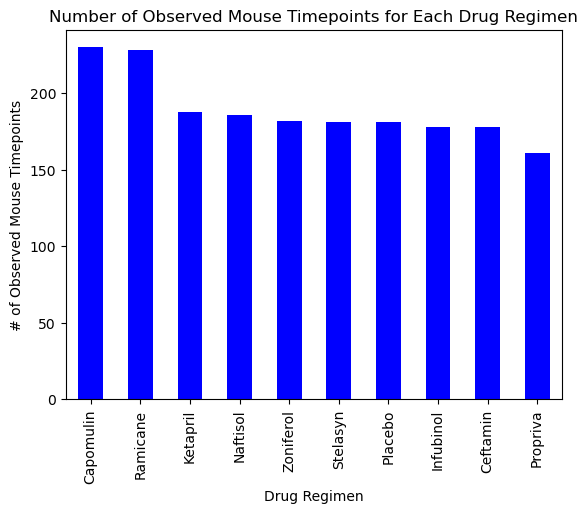

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = merged_data["Drug Regimen"].value_counts()

drug_regimen_counts.plot(kind="bar", color="blue")
plt.title("Number of Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

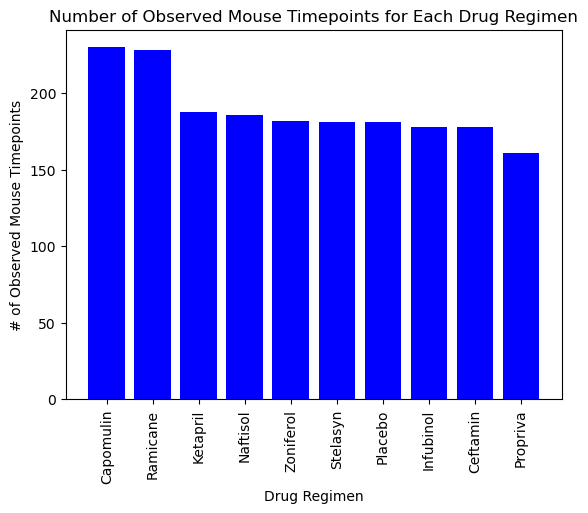

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


# Create a Pyplot bar plot based off of the group series from before and label the title
# Create the bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="blue")

# Add titles and labels
plt.title("Number of Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

plt.show()

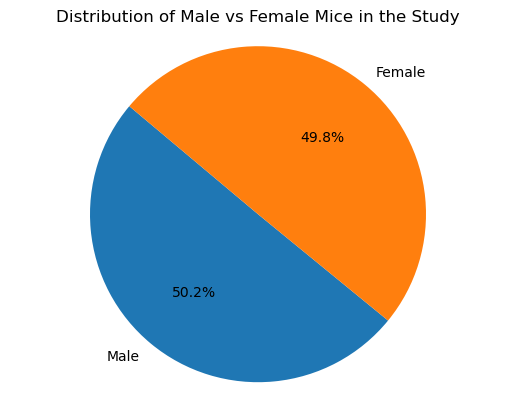

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the count of unique mice by gender
gender_distribution = mouse_metadata['Sex'].value_counts()

# Create the pie chart
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=['#1f77b4', '#ff7f0e'], startangle=140)

# Add a title
plt.title("Distribution of Male vs Female Mice in the Study")

# Ensure the pie chart is a circle
plt.axis('equal')

# Show the pie chart
plt.show()

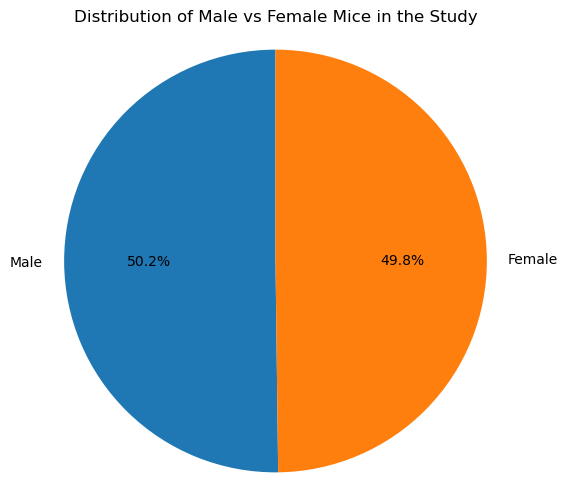

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_distribution = mouse_metadata['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", colors=['#1f77b4', '#ff7f0e'], startangle=90)
plt.title("Distribution of Male vs Female Mice in the Study")
plt.axis('equal')

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last_timepoint = Capomulin_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
Ramicane_last_timepoint = Ramicane_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
Infubinol_last_timepoint = Infubinol_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
Ceftamin_last_timepoint = Ceftamin_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

Capomulin_final = pd.merge(Capomulin_last_timepoint, Capomulin_df, on=["Mouse ID", "Timepoint"], how="left")
Ramicane_final = pd.merge(Ramicane_last_timepoint, Ramicane_df, on=["Mouse ID", "Timepoint"], how="left")
Infubinol_final = pd.merge(Infubinol_last_timepoint, Infubinol_df, on=["Mouse ID", "Timepoint"], how="left")
Ceftamin_final = pd.merge(Ceftamin_last_timepoint, Ceftamin_df, on=["Mouse ID", "Timepoint"], how="left")

print(Capomulin_final)
print(Ramicane_final)
print(Infubinol_final)
print(Ceftamin_final)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
5      i557         45    Capomulin  Female           1          24   
6      i738         45    Capomulin  Female          23          20   
7      j119         45    Capomulin  Female           7          23   
8      j246         35    Capomulin  Female          21          21   
9      l509         45    Capomulin    Male          17          21   
10     l897         45    Capomulin    Male          17          19   
11     m601         45    Capomulin    Male          22          17   
12     m957         45    Capomulin  Female           3          19   
13    

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {
    "Capomulin": Capomulin_final["Tumor Volume (mm3)"],
    "Ramicane": Ramicane_final["Tumor Volume (mm3)"],
    "Infubinol": Infubinol_final["Tumor Volume (mm3)"],
    "Ceftamin": Ceftamin_final["Tumor Volume (mm3)"]
}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen, volumes in tumor_volumes.items():
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
    
print(f"{regimen} Tumor Volume IQR:")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

    # add subset


    # Determine outliers using upper and lower bounds
outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
print(f"Outliers for {regimen}: {outliers.tolist()}\n")

Ceftamin Tumor Volume IQR:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound for Outliers: 25.355449580000002
Upper Bound for Outliers: 87.66645829999999
Outliers for Ceftamin: []



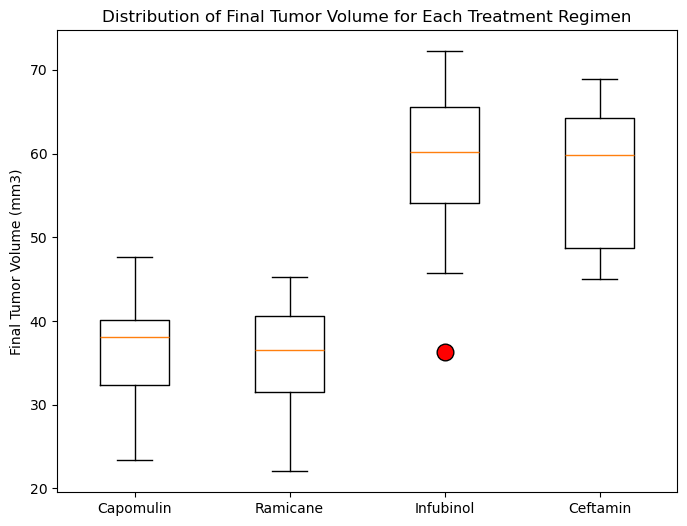

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes = [
    Capomulin_final["Tumor Volume (mm3)"],
    Ramicane_final["Tumor Volume (mm3)"],
    Infubinol_final["Tumor Volume (mm3)"],
    Ceftamin_final["Tumor Volume (mm3)"]
]

# Create a list of regimen names
regimen_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volumes, labels=regimen_names, flierprops=dict(markerfacecolor='r', marker='o', markersize=12))

# Add labels and title
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Final Tumor Volume for Each Treatment Regimen")

# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

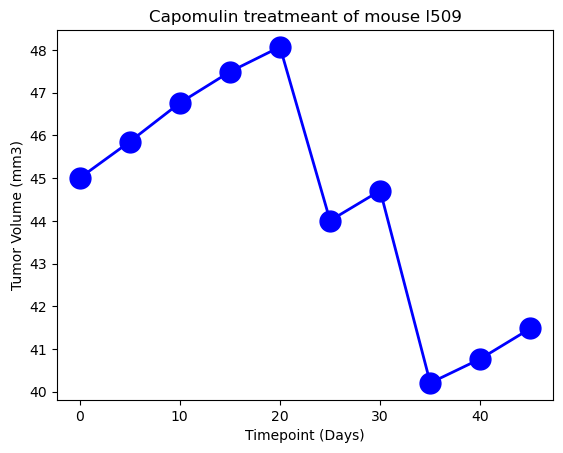

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

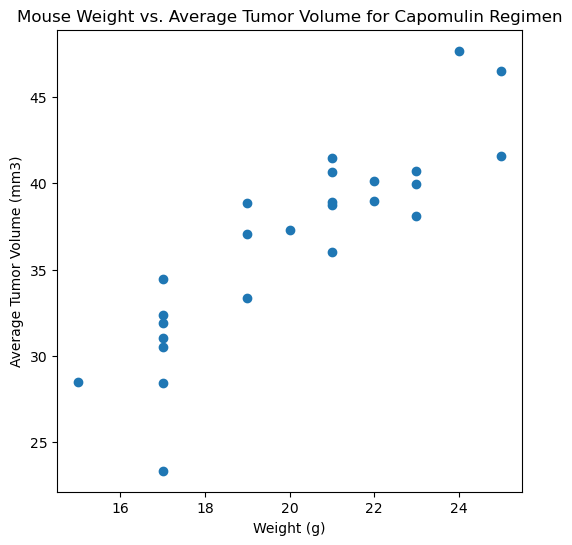

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = Capomulin_final.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = Capomulin_final.groupby("Mouse ID")["Weight (g)"].mean()
plt.figure(figsize=(6, 6))
plt.scatter(mouse_weight, average_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.876706040365812
Slope: 1.750468228958504
Intercept: 1.4481469525549002
R-squared: 0.7686134812139006


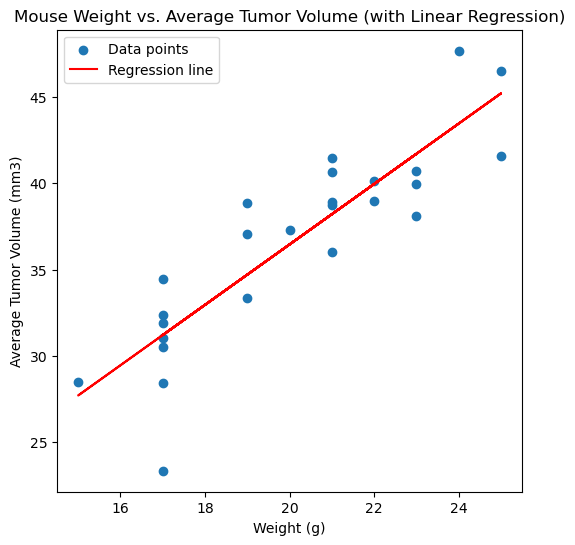

In [18]:
# Calculate the correlation coefficient and a linear regression model
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming Capomulin_final DataFrame contains data for Capomulin treatment

# Group the data by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = Capomulin_final.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the mouse weight information for each mouse
mouse_weight = Capomulin_final.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Generate a scatter plot with the regression line
plt.figure(figsize=(6, 6))
plt.scatter(mouse_weight, average_tumor_volume, label="Data points")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red", label="Regression line")

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (with Linear Regression)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()